# Regression

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

In [134]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head(3)

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000


In [135]:
df.shape

(2930, 6)

In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Qual,2930.0,6.094881,1.411026,1.0,5.0,6.0,7.00,10.0
Overall Cond,2930.0,5.563140,1.111537,1.0,5.0,5.0,6.00,9.0
Total Bsmt SF,2929.0,1051.614544,440.615067,0.0,793.0,990.0,1302.00,6110.0
Gr Liv Area,2930.0,1499.690444,505.508887,334.0,1126.0,1442.0,1742.75,5642.0
SalePrice,2930.0,180796.060068,79886.692357,12789.0,129500.0,160000.0,213500.00,755000.0


In [137]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [138]:
df = df.dropna()

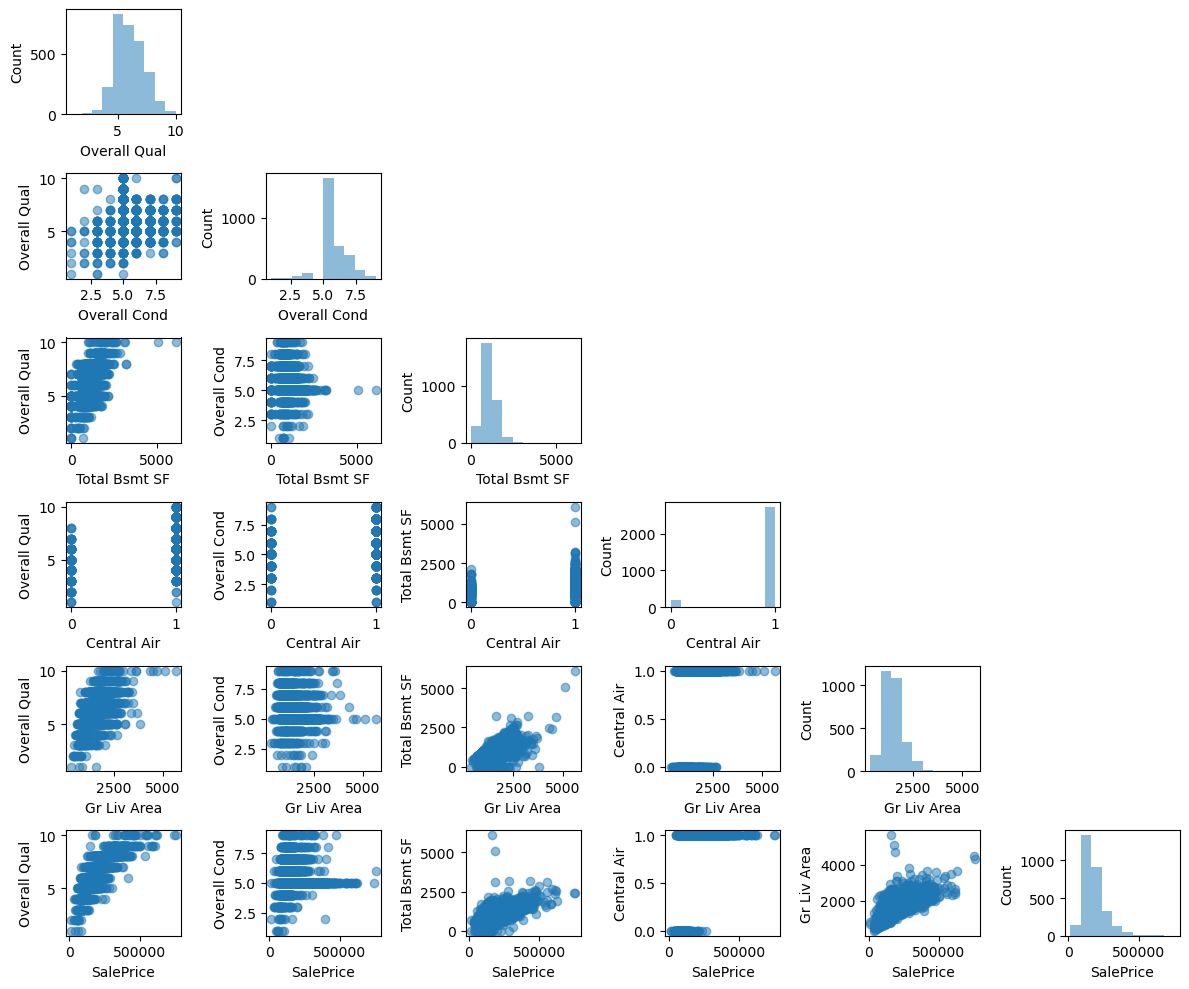

In [139]:
scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)
plt.tight_layout()
#plt.savefig('figures/09_04.png', dpi=300)
plt.show()

## Handle Outliers

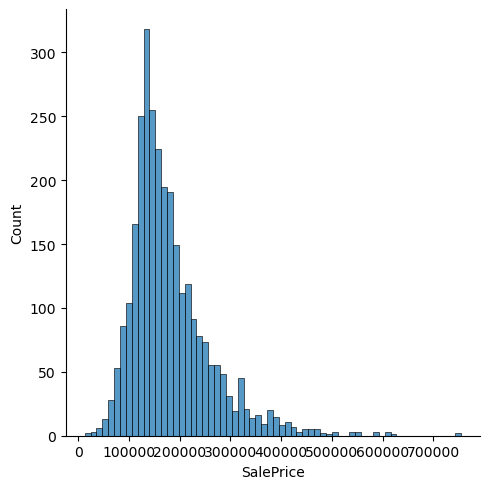

In [140]:
sns.displot(df, x='SalePrice')

In [122]:
print(df['SalePrice'].quantile(.95)) ## find from right to left 95 percent of the values
print(df['SalePrice'].quantile(.99))
print(df['SalePrice'].quantile(.999))

335000.0
456689.8399999995
615720.0000000012


In [123]:
df['SalePrice'].sort_values(ascending=False).head(10)

1767    755000
1760    745000
2445    625000
1063    615000
44      611657
432     610000
1637    591587
2450    584500
433     582933
2332    556581
Name: SalePrice, dtype: int64

In [124]:
df = df[df['SalePrice']<450000]

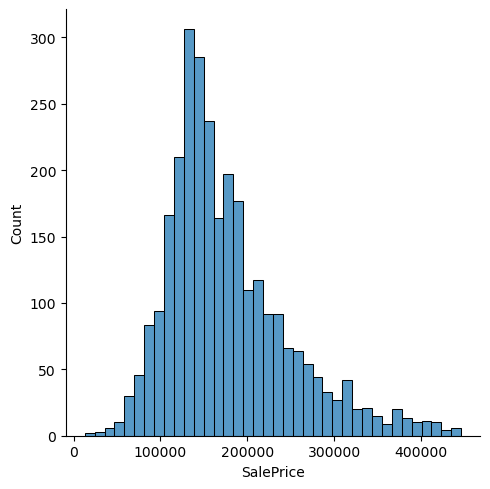

In [125]:
sns.displot(df, x='SalePrice')

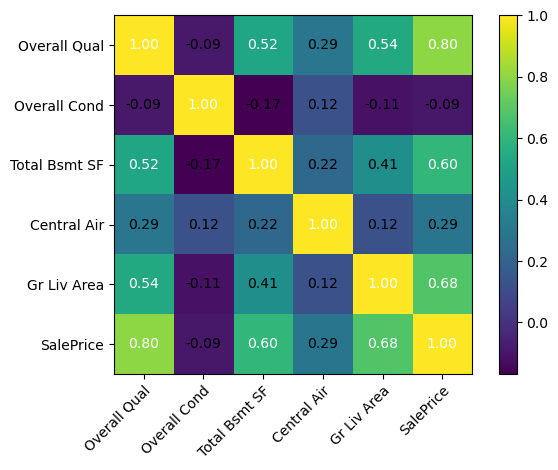

In [126]:
from mlxtend.plotting import heatmap


cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()
#plt.savefig('figures/09_05.png', dpi=300)
plt.show()

In [92]:
X = df[['Overall Qual', 'Total Bsmt SF', 'Central Air','Gr Liv Area']]
y = df['SalePrice']

In [142]:
import statsmodels.api as sm
X_lm = sm.add_constant(X)

## Fit the model

model = sm.OLS(y, X_lm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1197.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:44:01   Log-Likelihood:                -28501.
No. Observations:                2468   AIC:                         5.701e+04
Df Residuals:                    2463   BIC:                         5.704e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.454e+04   2853.452    -12.106

/Users/wynnephilpott/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


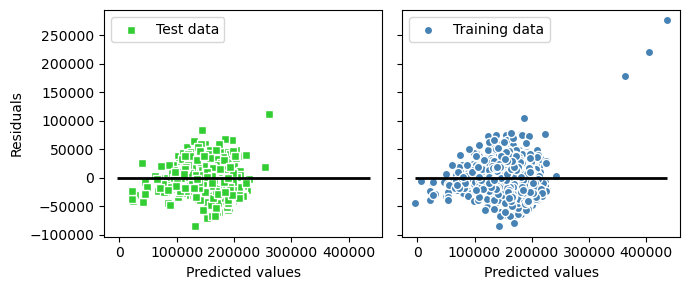

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
lm = LinearRegression()

lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_11.png', dpi=300)
plt.show()

## Model Evaluation

### MSE

In [129]:
from sklearn.metrics import mean_squared_error


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 667957246.61
MSE test: 542959000.97


### MAE

Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

In [130]:
from sklearn.metrics import mean_absolute_error


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 19149.36
MAE test: 17932.14


### RMSE

RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

In [131]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'MSE train: {rmse_train:.2f}')
print(f'MSE test: {rmse_test:.2f}')

MSE train: 25844.87
MSE test: 23301.48


**Similarities:** Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.

**Differences:** Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. **This means the RMSE should be more useful when large errors are particularly undesirable.** 

**Pros of Squaring** The squared difference has nicer mathematical properties; it's continuously differentiable (nice when you want to minimize it) also great for the context of estimation and regression analysis. It's a sufficient statistic for the Gaussian distribution, and it's (a version of) the L2 norm which comes in handy for proving convergence and so on.

### Coefficient of Determination

The fraction of response variance that is captured by the model. For the training dataset, R2 is bounded by [0,1] but for the test dataset it can be negative. A negative value indicates that the model fits the data worse than a horizaontal line representing the sample mean.

In [143]:
from sklearn.metrics import r2_score


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

R^2 train: 0.64
R^2 test: 0.71


## Ridge Regression and LASSO

In [144]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=10.0)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(lasso.coef_)

[1.88312004e+04 1.55471124e+01 2.63574831e+04 2.82730056e+01]


In [145]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 19147.67
MAE test: 17928.87


/Users/wynnephilpott/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Text(0.5, 1.0, 'Residual vs Predicted')

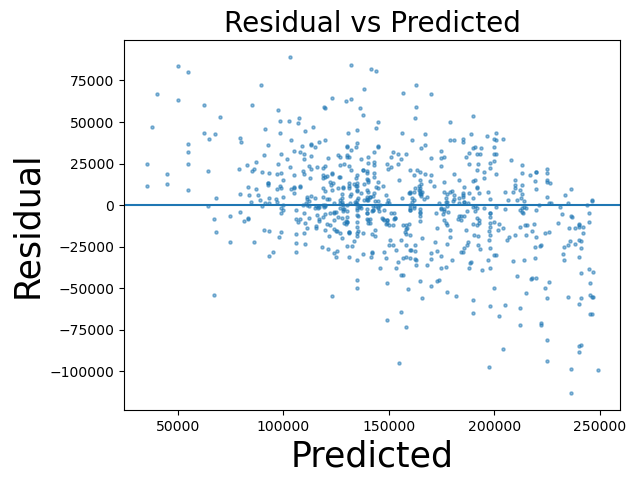

In [146]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, y_train)

predicted = dtr.predict(X_test)
residual = y_test - predicted

plt.scatter(predicted, residual,s=5,alpha=.5)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs Predicted',fontsize=20)

/Users/wynnephilpott/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


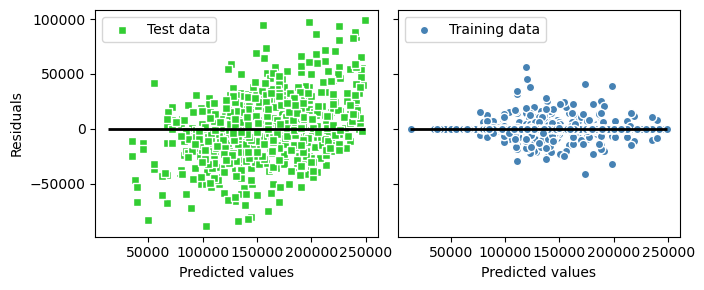

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

dtr = DecisionTreeRegressor(max_features='auto')

dtr.fit(X_train, y_train)
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_11.png', dpi=300)
plt.show()

In [148]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=50, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

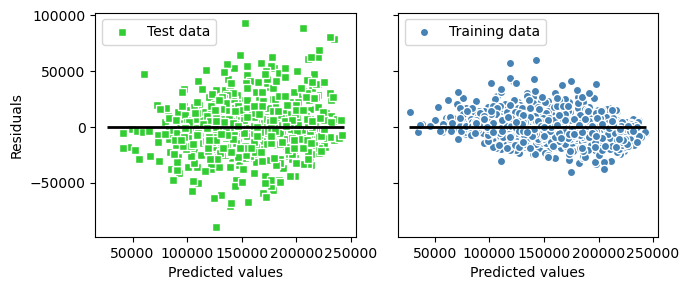

In [149]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_16.png', dpi=300)
plt.show()

In [150]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 7303.21
MAE test: 17094.71
R^2 train: 0.95
R^2 test: 0.72


/Users/wynnephilpott/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Text(0.5, 1.0, 'Residual vs Predicted')

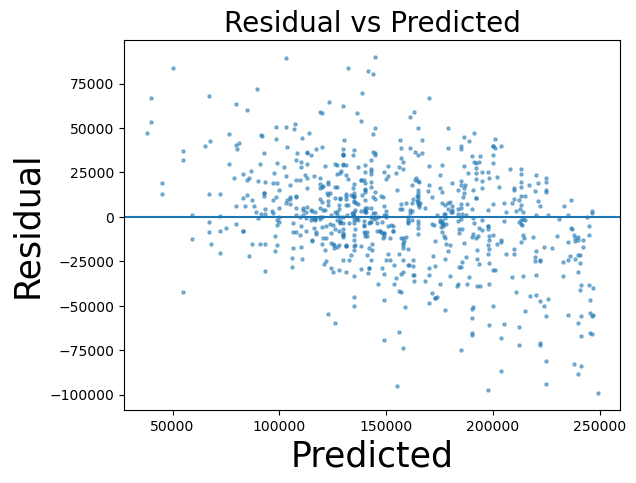

In [151]:
from sklearn.tree import DecisionTreeRegressor

forest = DecisionTreeRegressor(max_features='auto')
forest.fit(X_train, y_train)

predicted = forest.predict(X_test)
residual = y_test - predicted

plt.scatter(predicted, residual,s=5,alpha=.5)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs Predicted',fontsize=20)